## Clustering

Dataset: https://www.kaggle.com/usgs/earthquake-database

In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)

dataset = pd.read_csv("earthquake_database.csv")
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = dataset[["Depth", "Magnitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[0 0 0 ..., 0 0 0]


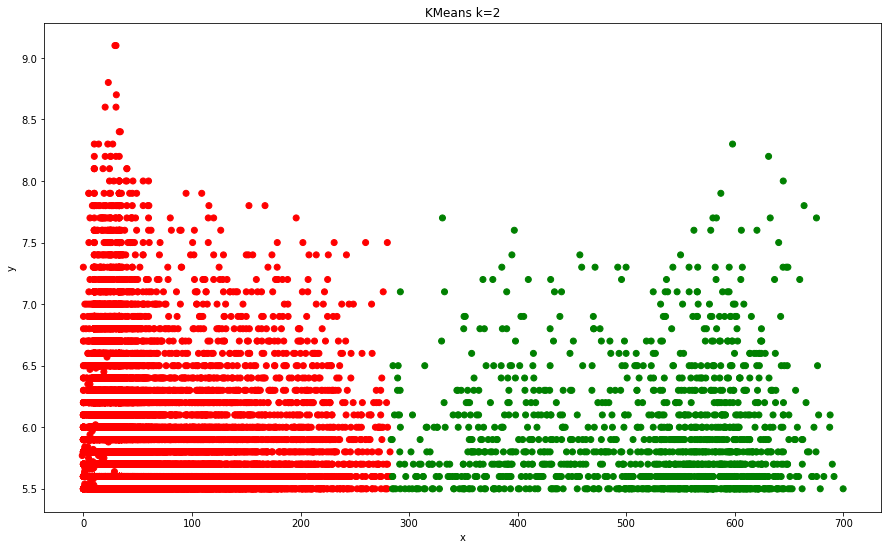

In [3]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(dataset['Depth'], dataset['Magnitude'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[2 0 0 ..., 0 0 0]


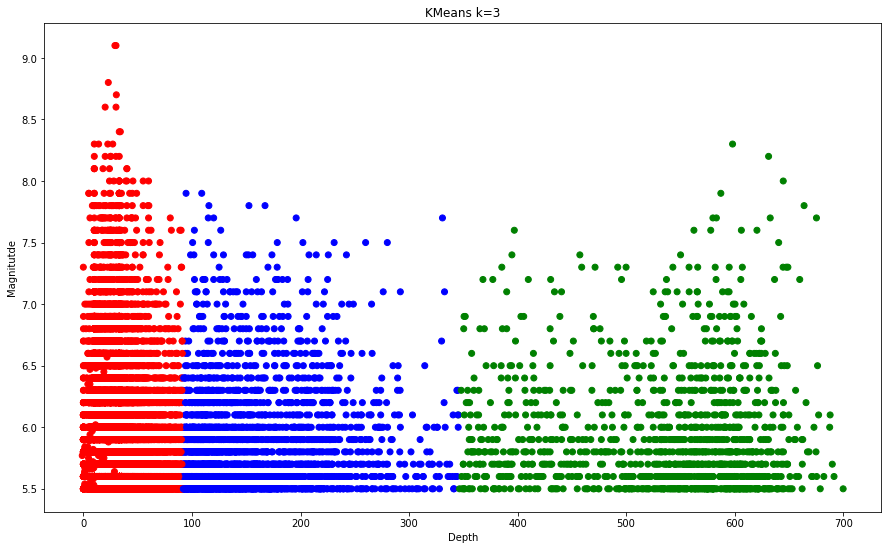

In [4]:
estimator = KMeans(n_clusters=3)
X = dataset[["Depth", "Magnitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
colors = set_colors(labels)
plt.scatter(dataset['Depth'], dataset['Magnitude'], c=colors)
plt.title("KMeans k=3")
plt.xlabel("Depth")
plt.ylabel("Magnitutde")
plt.show()

[2 0 0 ..., 0 0 0]


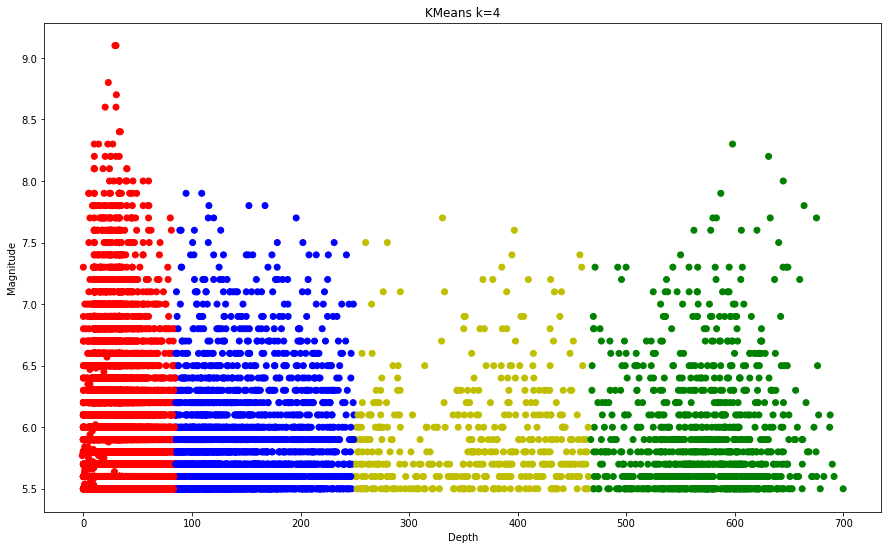

In [5]:
estimator = KMeans(n_clusters=4)
X = dataset[["Depth", "Magnitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
colors = set_colors(labels)
plt.scatter(dataset['Depth'], dataset['Magnitude'], c=colors)
plt.title("KMeans k=4")
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()

Counter({0: 21868, -1: 751, 7: 252, 2: 125, 10: 50, 9: 45, 6: 37, 3: 35, 1: 33, 8: 33, 5: 17, 22: 15, 12: 15, 4: 14, 14: 14, 11: 13, 17: 13, 13: 13, 16: 11, 18: 11, 15: 10, 23: 10, 21: 10, 20: 10, 19: 7})


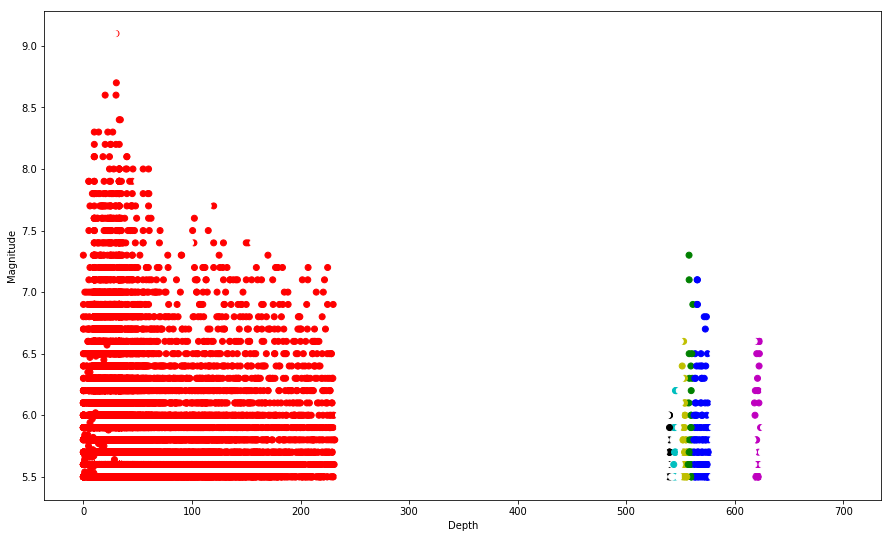

In [6]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
X = dataset[["Depth", "Magnitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataset['Depth'], dataset['Magnitude'], c=colors)
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()

Counter({0: 21376, -1: 1066, 2: 97, 12: 67, 13: 65, 24: 52, 3: 51, 18: 45, 1: 43, 6: 38, 10: 37, 16: 37, 11: 33, 20: 30, 15: 26, 14: 25, 22: 24, 7: 23, 25: 23, 23: 22, 8: 21, 17: 21, 29: 21, 9: 19, 4: 18, 19: 17, 30: 15, 28: 14, 21: 13, 26: 13, 33: 13, 27: 12, 5: 11, 34: 9, 32: 8, 31: 7})


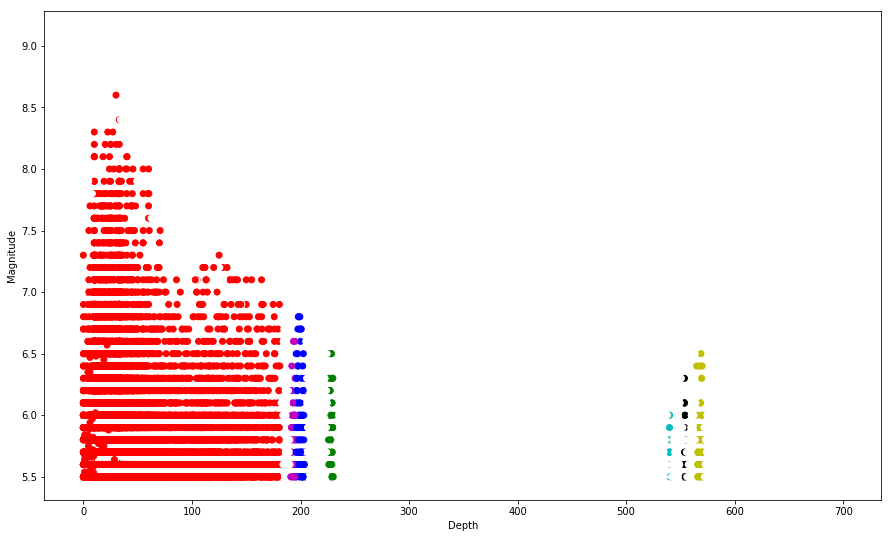

In [7]:
estimator = DBSCAN(eps=0.8, min_samples=10)
X = dataset[["Depth", "Magnitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataset['Depth'], dataset['Magnitude'], c=colors)
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()

Counter({1: 18047, 3: 2429, 2: 1645, 0: 1291})


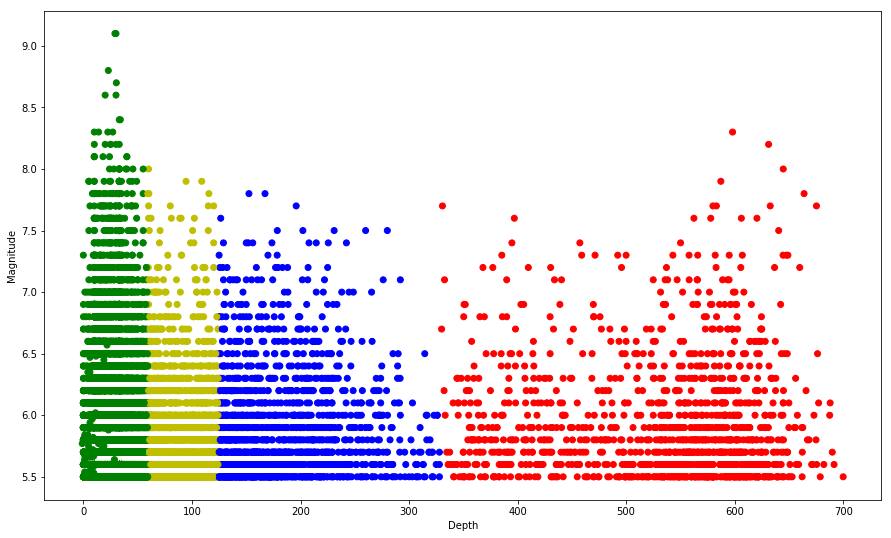

In [8]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = dataset[["Depth", "Magnitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(dataset['Depth'], dataset['Magnitude'], c=colors)
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.show()

[0 0 1 ..., 0 0 0]


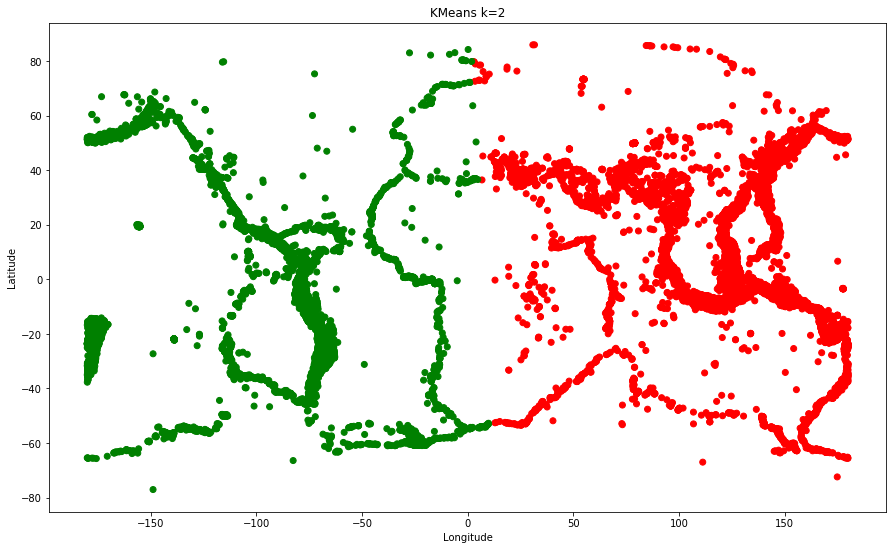

In [9]:
# Fit a k-means estimator
# Just to show the cluster for Longitude and Latitude
estimator = KMeans(n_clusters=2)
X = dataset[["Longitude", "Latitude"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(dataset['Longitude'], dataset['Latitude'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

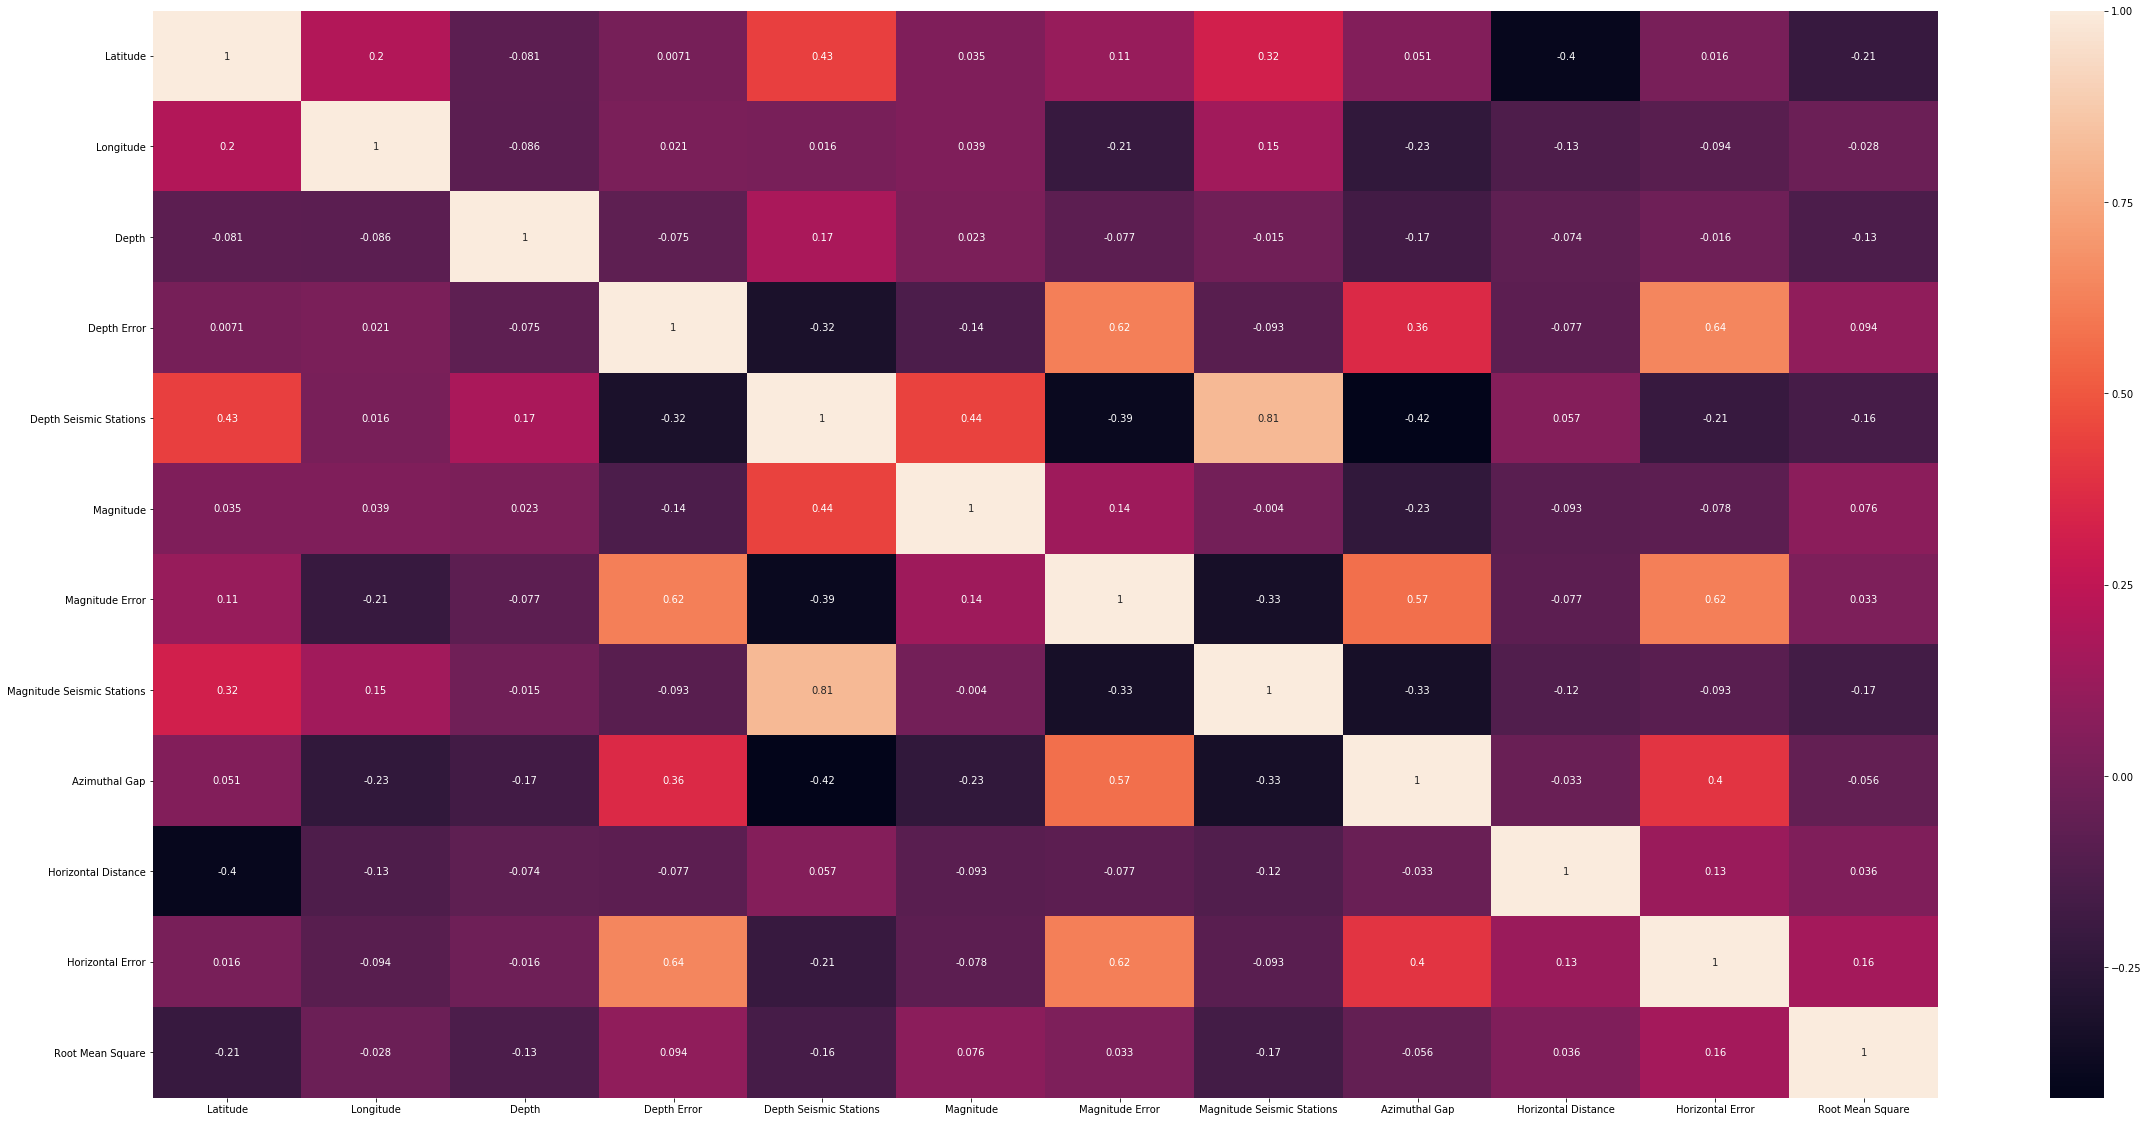

In [10]:
plt.figure(figsize=(40,20))
sns.heatmap(dataset.corr(),annot=True)

##### Answer the following questions for the clustering:

* Do the clustering methods generate the same clusters?
> Yes, clusters are same in all the clustering methods.

* Does scaling effect the clustering? 
> Yes, In DBSCAN scaling effect the clustering, As we increasing the value of eps(The maximum distance between two samples for them to be considered as in the same neighborhood) the output started covering more and more points. However, in my opinion, scaling completely depends on the data. In this case I choose Depth and Magnitude to cluster the data, so scaling did affect the data. But if I had chosed Longitude and Latitude as demonstrated below, scaling would not have had much effect.

* Does the clustering produce interesting groupings?
> Yes, with the change in the value of k cluster started becomes more and more specific. But had it been some kind of marketing or product based data, the clusters would have been more interesting.